In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_ohe = pd.get_dummies(X.iloc[:, :3], drop_first=True)
X = pd.concat([X_ohe, X.iloc[:, 3:]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0_b	var0_c	var1_e	var1_f	var2_h	var2_i	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


In [4]:
import warnings
warnings.filterwarnings('ignore')

### Question 1

In [5]:
X_train.head()

,var0_b,var0_c,var1_e,var1_f,var2_h,var2_i,var3,var4,var5,var6,...,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49
1090,0,0,0,0,1,0,0.317865,0.926584,0.541300,-1.221911,...,-1.376076,0.263780,0.233635,1.397691,0.770146,-0.816710,1.005554,1.811685,-0.325243,1.005554
3573,1,0,0,1,0,1,-0.193610,0.766617,1.206425,0.734126,...,0.470268,2.333090,-0.494657,-0.316812,-0.956667,0.016012,-0.990655,-0.085260,-0.960540,-0.990655
2677,1,0,1,0,0,0,1.503871,0.652745,0.079714,-0.067904,...,-0.238441,1.028420,-0.147989,0.315265,-0.764747,-0.261055,-0.119735,0.556490,-0.543285,-0.119735
3591,0,1,0,1,0,0,-0.410990,1.219417,-0.708164,1.420922,...,0.981440,-0.449043,-0.886637,-0.717677,0.948732,0.125828,-1.840215,-0.365459,-1.628198,-1.840215
288,0,0,0,0,0,0,-1.166192,1.166249,-1.710999,-1.204027,...,-1.424151,0.554357,0.162420,1.477299,1.304725,-0.895588,0.916873,1.977140,-0.541682,0.916873


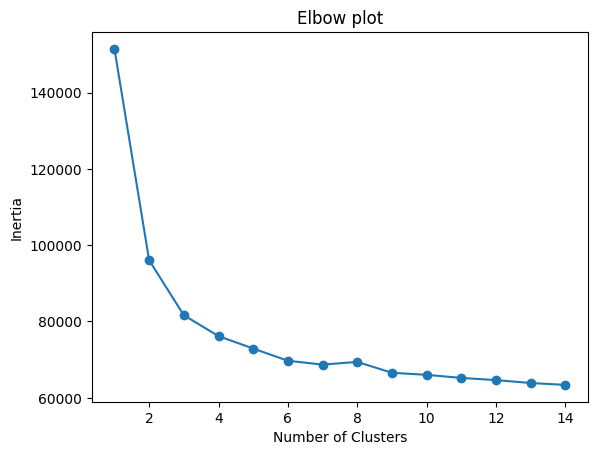

In [6]:
from sklearn.cluster import KMeans

distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("Elbow plot")
plt.show()

Looking at the elbow plot, we can say that the ideal number of clusters is 3, as this is where the plot starts to curve

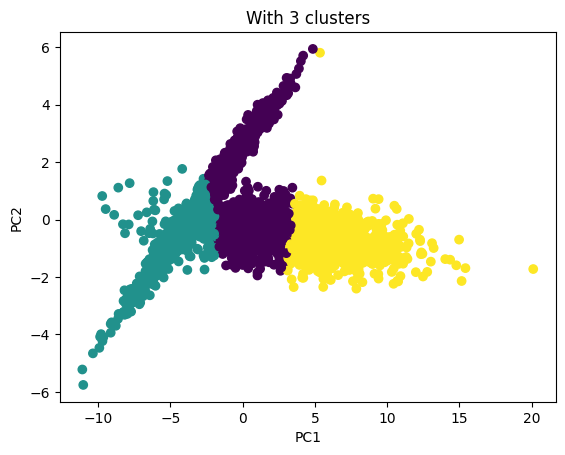

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X_train)


pca = PCA(n_components=2)
pc_scores = pca.fit_transform(X_train)


plt.scatter(pc_scores[:, 0], pc_scores[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("With 3 clusters")
plt.show()


The results from the clustering are not that great for 3 clusters. Let's try 4

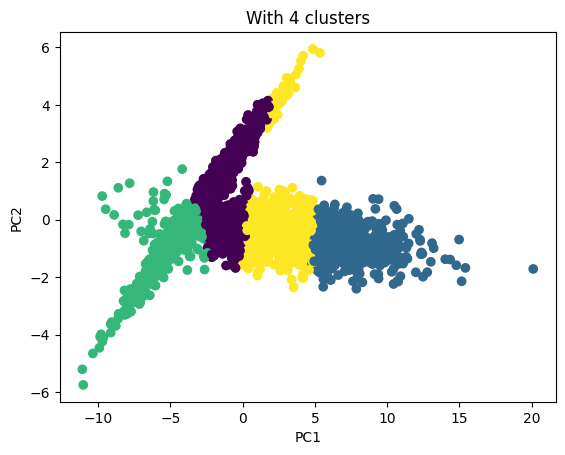

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(X_train)


pca = PCA(n_components=2)
pc_scores = pca.fit_transform(X_train)


plt.scatter(pc_scores[:, 0], pc_scores[:, 1], c=cluster_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("With 4 clusters")
plt.show()


This is also not great. But these were the two numbers for clusters that we were getting from the elbow plot

### Question 2

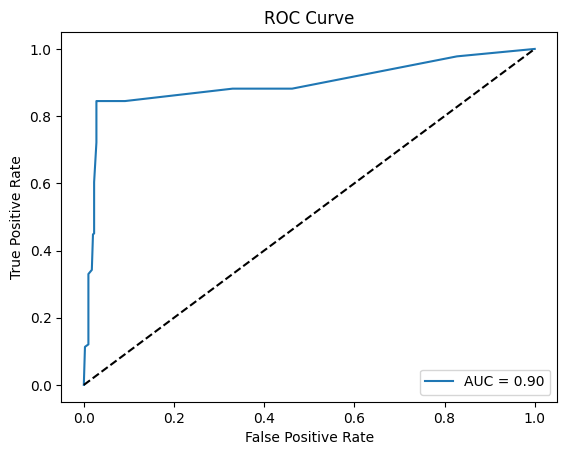

Accuracy: 0.91
Precision: 0.97
Recall: 0.84


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd

preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

logreg = LogisticRegression()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', logreg)
])

param_grid = {
    'logreg__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

### Question 3

In [10]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(),X.columns[3:]),
        ('ohe', OneHotEncoder(drop='first'), X.columns[:3])
    ])

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

In [11]:
param_grid = {
    'pca__n_components': [3, 6, 9, 12],
    'logreg__C': [0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['var1_f', 'var2_h', 'var2_i', 'var3', 'var4', 'var5', 'var6', 'var7',
       'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15',
       'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23',
       'var24', 'var25', 'var26', 'var27', 'var28...
       'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39',
       'var40', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47',
       'var48', 'var49'],
      dtype='object')),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['var0_b', 'var0_c', 'var1_e'], dtype='object'))])),
                                       ('pca', PCA()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10],
                         'pca__n_components': [3, 6, 9, 12]})

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.93
Precision: 0.99
Recall: 0.87


In [13]:
grid_search.best_params_

{'logreg__C': 10, 'pca__n_components': 6}

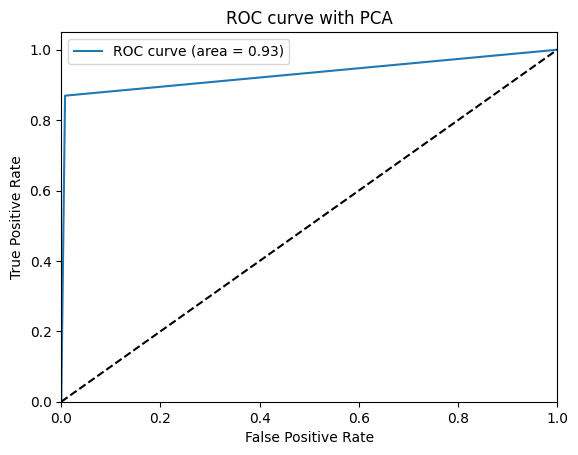

In [14]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.title("ROC curve with PCA")
plt.show()

Thus, we can see an improvement in the score, as well as in the area uner ROC curve, after using PCA of 3 components

### Question 4

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(),X.columns[3:]),
        ('ohe', OneHotEncoder(drop='first'), X.columns[:3])
    ])


pipeline = Pipeline([
    ('preprocess',preprocessor),
    ('kmeans', KMeans()),
    ('logreg', LogisticRegression())
])

param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'logreg__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['var1_f', 'var2_h', 'var2_i', 'var3', 'var4', 'var5', 'var6', 'var7',
       'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15',
       'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23',
       'var24', 'var25', 'var26', 'var27', 'var28...
       'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39',
       'var40', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47',
       'var48', 'var49'],
      dtype='object')),
                                                                        ('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['var0_b', 'var0_c', 'var1_e'], dtype='object'))])),
                                       ('kmeans', KMeans()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': [2, 3, 4, 5],
                         'logreg__C': [0.1, 1, 10, 100]},
             scoring='roc_auc')

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.95
Precision: 0.99
Recall: 0.90


In [17]:
grid_search.best_params_

{'kmeans__n_clusters': 5, 'logreg__C': 10}

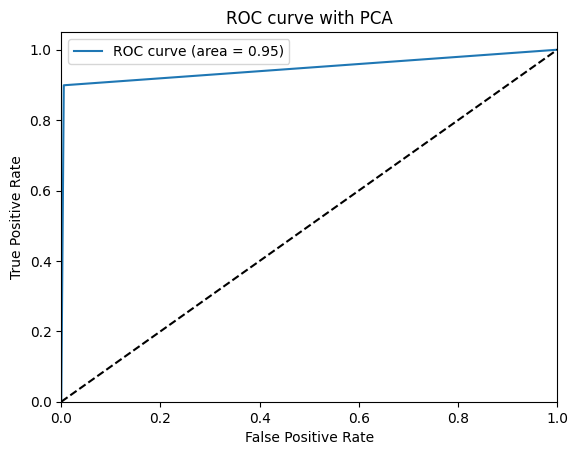

In [18]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.title("ROC curve with PCA")
plt.show()

We can see that with a pre-processing of using kmeans with 5 clusters, when paired with logistic regression performs slightly better than with PCA. SO, we can use this as the best model